# AI/ML LAB 8

##Importing Libraries and Dataset

In [ ]:
#Importing Libraries and Dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Importing the Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

## Data Munching and wrangling

In [5]:
# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)

irisdata

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Processing

In [6]:
#Preprocessing
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


## Model Training and Predictions 

In [11]:
#Polynomial Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=2)
svclassifier.fit(X_train, y_train)
#Making Predictions
y_pred = svclassifier.predict(X_test)
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
polly_acc = accuracy_score(y_test, y_pred)

[[16  0  0]
 [ 0 10  0]
 [ 0  0  4]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

1.0


## Task 1 : Try following kernels and compare the performance. 
* Gaussian Kernel
* Sigmoid Kernel


In [12]:
# Gaussian Kernel (rbf)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=2)
svclassifier.fit(X_train, y_train)
#Making Predictions
y_pred = svclassifier.predict(X_test)
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
rbf_acc = accuracy_score(y_test, y_pred)

[[16  0  0]
 [ 0 10  0]
 [ 0  0  4]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

1.0


In [13]:
# Sigmoid Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid', degree=2)
svclassifier.fit(X_train, y_train)
#Making Predictions
y_pred = svclassifier.predict(X_test)
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
sigmoid_acc = accuracy_score(y_test, y_pred)

[[ 0  0 16]
 [ 0  0 10]
 [ 0  0  4]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        16
Iris-versicolor       0.00      0.00      0.00        10
 Iris-virginica       0.13      1.00      0.24         4

       accuracy                           0.13        30
      macro avg       0.04      0.33      0.08        30
   weighted avg       0.02      0.13      0.03        30

0.13333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparision Matrix


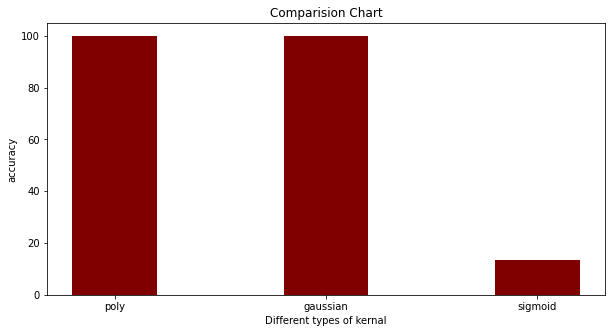

In [15]:
# creating the dataset
data = {'poly':polly_acc*100, 'gaussian':rbf_acc*100, 'sigmoid':sigmoid_acc*100}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Different types of kernal")
plt.ylabel("accuracy")
plt.title("Comparision Chart")
plt.show()

# Task 2
## Spam Mail Detection Using Support Vector Machine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
data = pd.read_csv('spam.csv',encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data.rename(columns = {'v1':'Label', 'v2':'EmailText'}, inplace = True)
data = data[['Label', 'EmailText']]
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
X = data['EmailText'].values
y = data['Label'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [8]:
# Converting String to Integer
cv = CountVectorizer() 
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

RBF kernal 

In [23]:
#Making Predictions
y_pred = classifier.predict(X_test)
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred))
rbf = accuracy_score(y_test, y_pred)

[[925  24]
 [ 54 112]]
              precision    recall  f1-score   support

         ham       0.94      0.97      0.96       949
        spam       0.82      0.67      0.74       166

    accuracy                           0.93      1115
   macro avg       0.88      0.82      0.85      1115
weighted avg       0.93      0.93      0.93      1115

accuracy =  0.9300448430493273


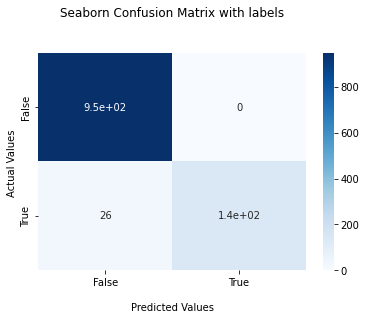

In [15]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Poly Kernal

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

#Making Predictions
y_pred = classifier.predict(X_test)
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred))
poly = accuracy_score(y_test, y_pred)

[[945   4]
 [ 61 105]]
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       949
        spam       0.96      0.63      0.76       166

    accuracy                           0.94      1115
   macro avg       0.95      0.81      0.87      1115
weighted avg       0.94      0.94      0.94      1115

accuracy =  0.9417040358744395


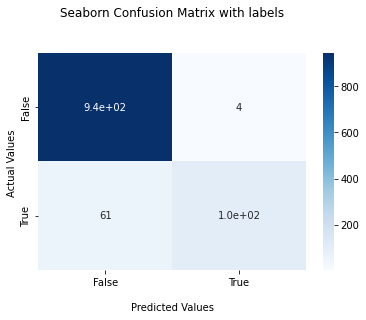

In [19]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Sigmoid Kernal

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

#Making Predictions
y_pred = classifier.predict(X_test)
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred))
sigmoid = accuracy_score(y_test, y_pred)

[[925  24]
 [ 54 112]]
              precision    recall  f1-score   support

         ham       0.94      0.97      0.96       949
        spam       0.82      0.67      0.74       166

    accuracy                           0.93      1115
   macro avg       0.88      0.82      0.85      1115
weighted avg       0.93      0.93      0.93      1115

accuracy =  0.9300448430493273


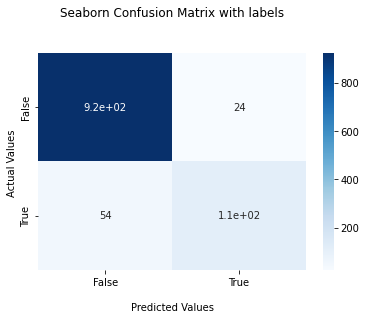

In [22]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Comparison Matrix

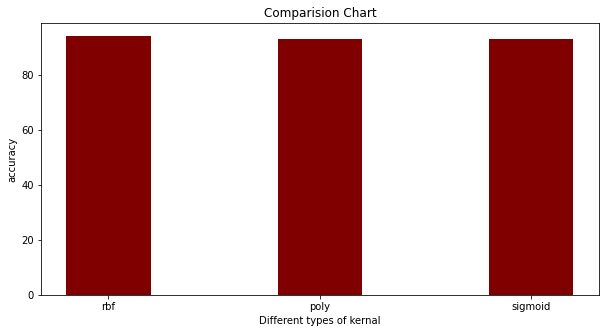

In [27]:
# creating the dataset
data = { 'rbf':poly*100, 'poly':rbf*100,'sigmoid':sigmoid*100}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Different types of kernal")
plt.ylabel("accuracy")
plt.title("Comparision Chart")
plt.show()

# Thankyou 
> Auther - Rugved Chavan